In [1]:
import pandas as pd
df=pd.read_csv("d:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
df2=df.drop(df.index[range(40)]) # 처음 40행 제거 - 의도적 불균형 데이터셋

In [3]:
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [4]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X=df2[cols]
y=df2['Species']

In [5]:
df2.Species.value_counts()

1    50
2    50
0    10
Name: Species, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'iris\n (0 : setosa, 1 : versicolor, 2 : virginica)')

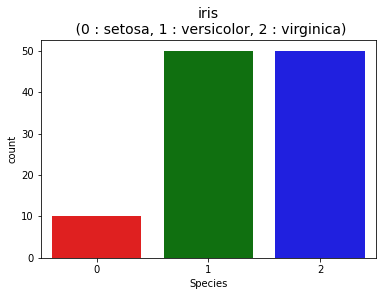

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

colors=['red','green','blue']
sns.countplot('Species', data=df2, palette=colors)
plt.title('iris\n (0 : setosa, 1 : versicolor, 2 : virginica)', fontsize=14)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Species, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression

# 기본 옵션 : 모든 클래스에 1이 부여됨
logit1=LogisticRegression(random_state=0)

# y값에 반비례하는 가중치를 n_samples/(n_classes * np.bincount(y))로 자동 조정
logit2=LogisticRegression(random_state=0, class_weight='balanced')

# 가중치를 직접 입력하는 옵션
logit3=LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2})

In [9]:
# class_weight='balanced'일 경우 샘플 개수에 반비례하는 가중치가 곱해짐
import numpy as np
print(np.bincount(y)) # 샘플의 개수 (10/50/50)
print(88/(3*np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [10]:
for logit in [logit1, logit2, logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print("학습용 :",logit.score(X_train, y_train))
    print("검증용 :",logit.score(X_test, y_test))
    print()

LogisticRegression(random_state=0)
학습용 : 0.9545454545454546
검증용 : 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용 : 0.9545454545454546
검증용 : 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용 : 0.9545454545454546
검증용 : 1.0

